# Import Modules

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings

# Load The Data Set

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#to display stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display no of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Pre Processing Of Data Set

In [7]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

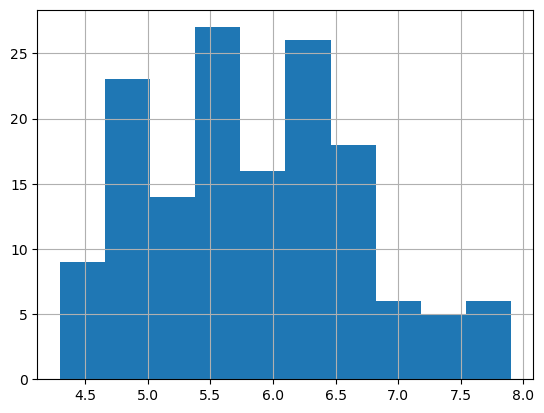

In [8]:
#plot an histogram
df['sepal_length'].hist()

<Axes: >

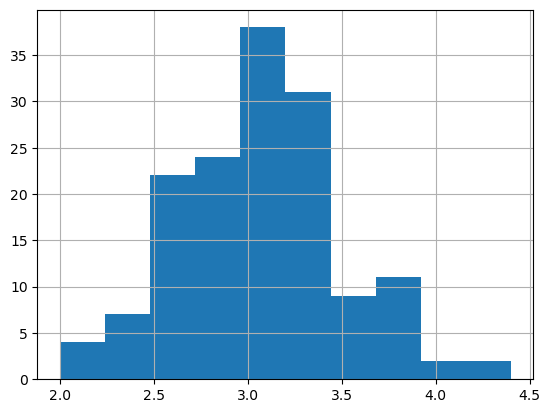

In [9]:
df['sepal_width'].hist()

<Axes: >

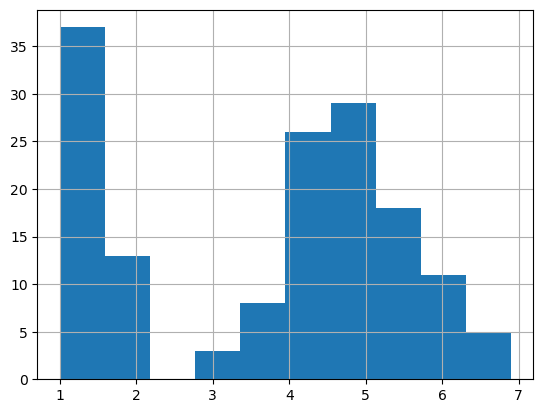

In [10]:
df['petal_length'].hist()

<Axes: >

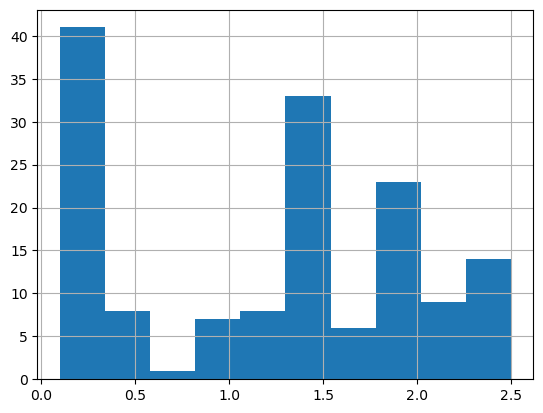

In [11]:
df['petal_width'].hist()

In [12]:
#scatter plots
colors=['red','orange','blue']
species = [ 'Iris-virginica', 'Iris-versicolor','Iris-setosa']

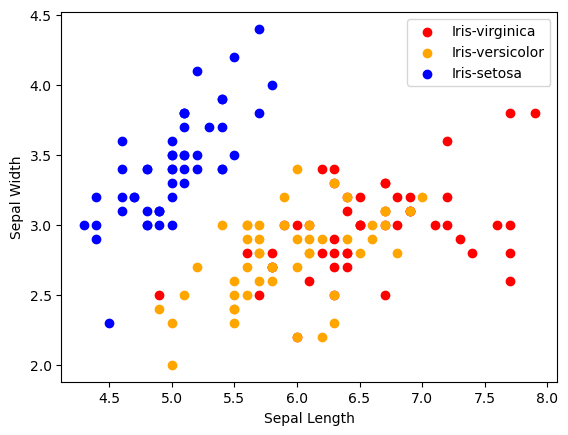

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i] , label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

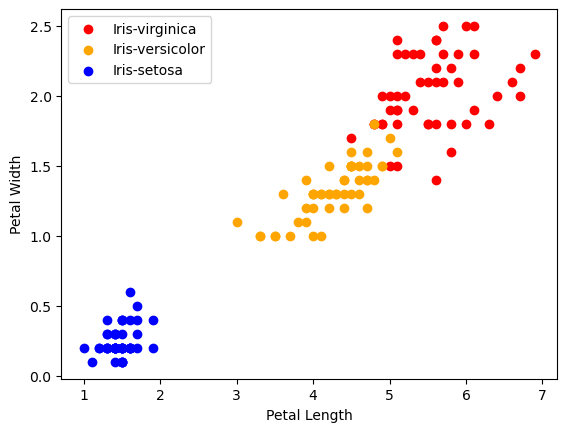

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i] , label=species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

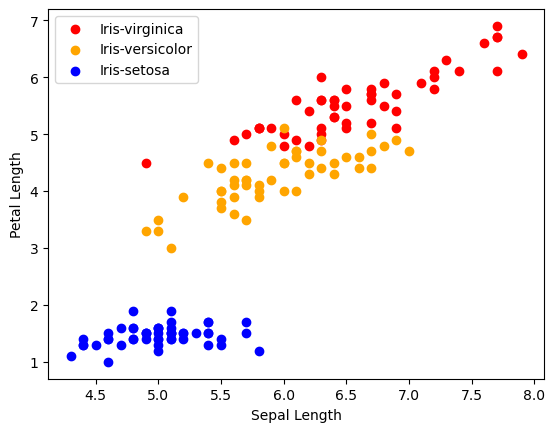

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c = colors[i] , label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

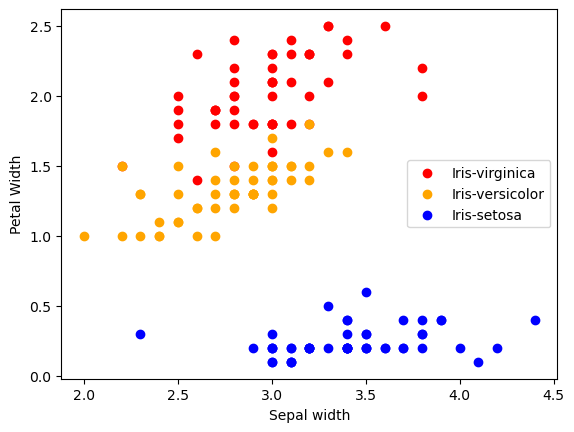

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i] , label=species[i])
    
plt.xlabel('Sepal width')
plt.ylabel('Petal Width')
plt.legend()

# Coorelation Matrix

In [23]:
df.corr()

C:\Users\ADEEL\AppData\Local\Temp\ipykernel_3440\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\ADEEL\AppData\Local\Temp\ipykernel_3440\238983159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

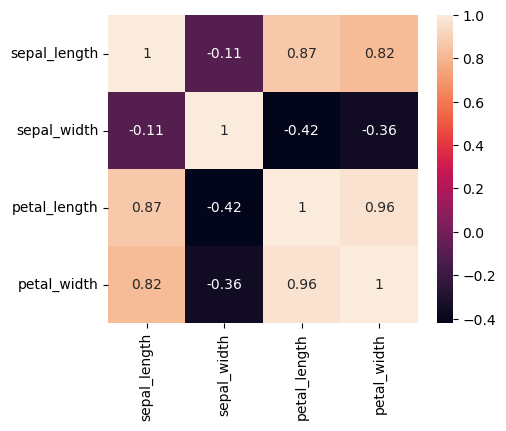

In [25]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Model Training

In [50]:
from sklearn.model_selection import train_test_split
x = df.drop(columns= 'species')
y=df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30)

In [61]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
print("accuracy:" ,model.score(x_test,y_test)*100)

accuracy: 95.55555555555556


In [64]:
#knn k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [65]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
print("Accuracy:" , model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
print("Accuracy:" , model.score(x_test,y_test)*100)

Accuracy: 86.66666666666667
